<a href="https://colab.research.google.com/github/vishnugandra/AIML_2303A52194/blob/main/AIML_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay

# Generate a binary classification dataset
# Explicitly set n_informative and n_redundant to values that sum to less than n_features
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1,
                            n_informative=1, n_redundant=0, random_state=42)
                            # Changed n_informative to 1 and n_redundant to 0.
                            # The sum of n_informative, n_redundant, and n_repeated (default 0) is now 1, which is less than n_features (2).

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

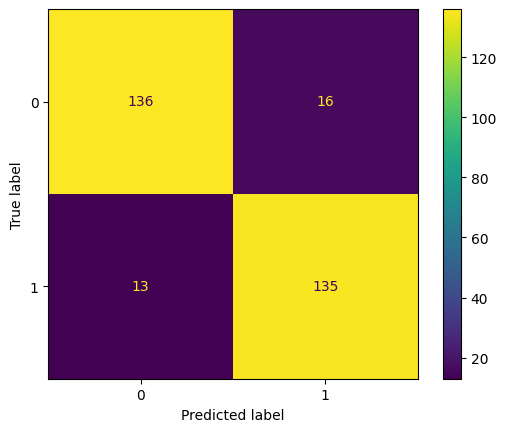

Confusion Matrix:
[[136  16]
 [ 13 135]]


In [2]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

In [3]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1-Score: {f1}")

Accuracy: 0.9033333333333333
F1-Score: 0.903010033444816


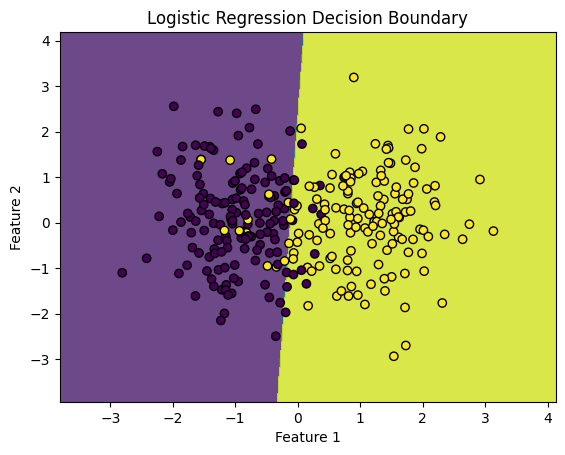

In [4]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.show()

# Visualize the decision boundary
plot_decision_boundary(log_reg, X_test, y_test)

In [5]:
# Create and train the logistic regression model with L2 regularization
log_reg_l2 = LogisticRegression(penalty='l2', C=1.0)
log_reg_l2.fit(X_train, y_train)

# Make predictions with the L2 regularized model
y_pred_l2 = log_reg_l2.predict(X_test)

# Calculate accuracy and F1-score for the L2 regularized model
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
f1_l2 = f1_score(y_test, y_pred_l2)

print(f"Accuracy with L2 Regularization: {accuracy_l2}")
print(f"F1-Score with L2 Regularization: {f1_l2}")

# Optional: Create and train the logistic regression model with L1 regularization
log_reg_l1 = LogisticRegression(penalty='l1', solver='saga', C=1.0)
log_reg_l1.fit(X_train, y_train)

# Make predictions with the L1 regularized model
y_pred_l1 = log_reg_l1.predict(X_test)

# Calculate accuracy and F1-score for the L1 regularized model
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
f1_l1 = f1_score(y_test, y_pred_l1)

print(f"Accuracy with L1 Regularization: {accuracy_l1}")
print(f"F1-Score with L1 Regularization: {f1_l1}")

Accuracy with L2 Regularization: 0.9033333333333333
F1-Score with L2 Regularization: 0.903010033444816
Accuracy with L1 Regularization: 0.9066666666666666
F1-Score with L1 Regularization: 0.9060402684563759
